<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Tonatiuh Navarro Silva y Pablo Muñoz 

**Fecha:** 22 de Junio del 2021

**Expediente** : 722399 y 719963
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/if722399/Tarea5y6_JTNavarro_PHMu-oz

 Tarea 6: Clase 10

In [4]:
import numpy as np
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
 

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


Código de solución estudiante 1

Validamos que se cumpla la condición: max t(x) = [1.875] max f(x) = [1.875]


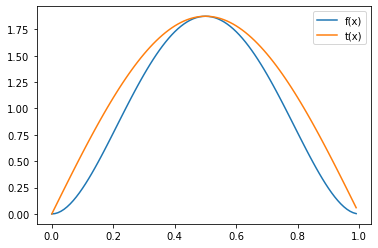

In [59]:
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4) # Definimos f(x)
# Obtener el máximo de la función
max_f = f(optimize.fmin(lambda x: -f(x),0, disp = False)) # obtenemos el máximo de la función
t = lambda x: max_f*np.sin(np.pi*x) # Establecemos la condicion que nos proporciona el problema
max_t = f(optimize.fmin(lambda x: -t(x), 0, disp=False)) # Sacamos el máximo de t(x)

x = np.arange(0,1,.01)
print('Validamos que se cumpla la condición: max t(x) =',max_t, 'max f(x) =',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();

**Código de solución Pablo Muñoz**

In [5]:
from scipy import optimize
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

Puntos máximos [1.875] [1.875]


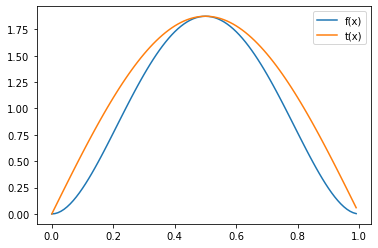

In [6]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función constante
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('Puntos máximos',max_f,max_t)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).


Código de solución - Tonatiuh

$$
c = \int_{-\infty}^{\infty} t(x) dx = \int_{0}^{1} a*sin(\pi x) dx \\
\int_{0}^{1} a*sin(\pi x) dx = \frac{2a}{\pi}  \\ 
g(x) = \frac{t(x)}{c}\\
g(x) = \frac{a*sin(\pi x)}{\frac{2a}{\pi}}\\
g(x) = \frac{\pi}{2}sin(\pi x)\\
$$

**Código de solución Pablo Muñoz**

Se sabe que $g(x)=\frac{t(x)}{c}$ donde $c=\int_{-\infty}^{\infty} t(x)dx$ Por lo tanto es necesario primero calcular c para después efectuar la división. 
$$
\int_{-\infty}^{\infty} t(x)dx=a(-\cos(\pi x))\frac{1}{\pi}|_{0}^{1}=a\frac{2}{\pi}=c
$$

Calculado g(x) obtenemos:

$$
g(x)=\frac{a \sin(\pi x)}{\frac{2a}{\pi}}=\frac{\pi \sin(\pi x)}{2}
$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 


Código de solución estudiante 1

#### Como lo que tenemos es g(x) osea -> PDF, Necesitamos G(x) -> CDF


$$
G(x) = \int g(x) dx \\
G(x) = \int_{0}^{1} \frac{\pi}{2}sin(\pi x) dx\\
G(x) = \frac{1-cos(\pi x)}{2}\\
U = \frac{1-cos(\pi x)}{2}\\
x = \frac{cos^{-1}(-2U+1)}{\pi}
$$

**Solución Estudiante 2 Pablo Muñoz**

Para aplicar el método de la trasnformada inversa es necesario conocer primeor G(x) para esto realizamos la siguiente integral 
$$
G(x)=\int_0^x g(x)dx=\int_0^x \frac{\pi \sin(\pi x)}{2} dx= \frac{-1}{2}\cos(\pi x)|_0^x=\frac{1}{2}-\frac{1}{2}\cos(\pi x)
$$

Una vez calculada G(x) aplicamos el método de la trasformada inversa:

$$
U=\frac{1}{2}-\frac{1}{2}\cos(\pi x)
$$

Realizando el despeje obtenemos 

$$
x=\frac{1}{\pi}\cos^{-1}(-2U+1)
$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.  

Código de solución estudiante 1

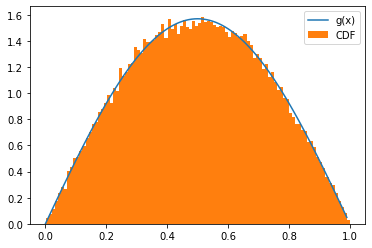

In [20]:
N = 100000

u = np.random.rand(N)
x = np.arange(0,1,0.01)

g = lambda x: (np.pi*np.sin(np.pi*x))/2
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)


plt.plot(x, g(x), label = 'g(x)')
plt.hist(g_inv(u), 100, density = True, label = 'CDF')
plt.legend();

Código de solución estudiante 2

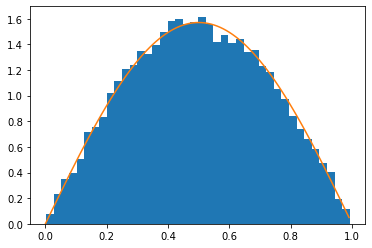

In [7]:
def comparar_aleatorios_densidad(f: 'función de distribución de probabiliad', 
                                 finv: 'función inversa', 
                                 N: 'Número de valores que queremos generar'):
    '''Esta función dada una función de distribución f y una función inversa que genera valores que se distribyen como f
    grafica el histograma de los valores generados por la funcion inversa así como la grafica de la función de distribución
    de probabilidad para poder hacer la comparación de estos y verificar si se cumple'''
    
    U=np.random.uniform(0, 1, N)
    frand=finv(U)
    
    x=np.arange(0,1,0.01)
    fdensidad=f(x)
    
    plt.hist(frand, density=True, bins=40)
    plt.plot(x, fdensidad)
    plt.show()

g=lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv=lambda u: (1/np.pi)*np.arccos(-2*u+1)
N=10000

comparar_aleatorios_densidad(g, G_inv, N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones  𝑓(𝑥)  y  𝑡(𝑥)  para validar que todos los cálculos anteriores están correctamente realizados.  

Código de solución estudiante 1

In [57]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]       
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

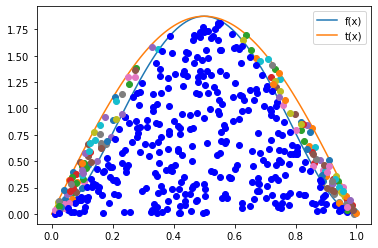

In [61]:
N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

A = Acep_rechazo(R2,R1,f,t)

**Código de solución Pablo Muñoz**

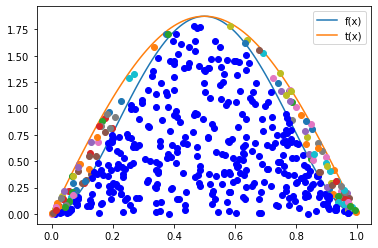

In [9]:
# Código de solución estudiante 2
def aceptacion_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    '''Esta función nos regresa una gráfica donde se muestran los puntos acetpados y los puntos rechazados del 
    metodo de acepatación y rechazo'''

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    return 

N=500 #número de puntos
R2=np.random.rand(N)
R1=np.random.rand(N)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend(loc="best")


aceptacion_rechazo(R2,R1,f,t)#aplicamos método



6. Comparar el porcentaje de puntos de aceptación cuando se usa  𝑡(𝑥)  constante y  𝑡(𝑥)  un pulso senoidal. Concluir

Código de solución estudiante 1

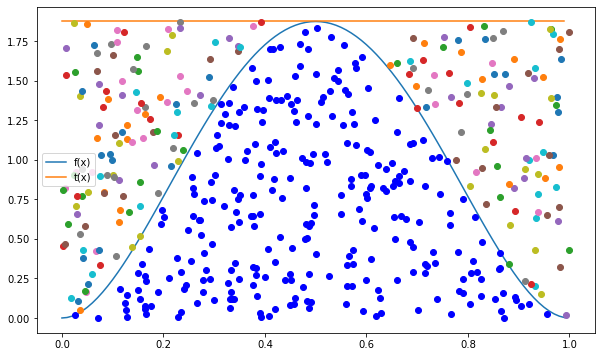

In [62]:
t = lambda x: max_f * np.ones(len(x))
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(10, 6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

AA = Acep_rechazo(R2, R1, f, t)
plt.show()

In [66]:
print(f'{len(A)*100/500:.4f}% de valores aceptados con t(x) senoidal')
print(f'{len(AA)*100/500:.4f}% de valores aceptados con t(x) constante')

66.4000% de valores aceptados con t(x) senoidal
56.0000% de valores aceptados con t(x) constante


#### Es mejor utilizar t(x) senoidal debido a que si utilizamos constante tendrìamos que generar màs variables aleatorias

**Código de solución Pablo Muñoz**

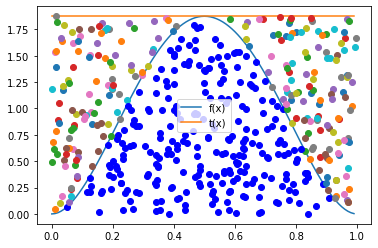

In [12]:
t_cons = lambda x: max_f*np.ones(len(x))#usamos max_f para hacer t(x) constante

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t_cons(x), label='t(x)')
plt.legend(loc="best")



aceptacion_rechazo(R2,R1,f, t_cons)


In [14]:
def conteo_aceptacion_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    '''Esta función nos regresa el vector de puntos aceptados del método de acpetación y rechazo'''

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
  
    aceptados = [R1[i] for i in range(len(R1)) if condition[i]]
    return aceptados

cont_t_var=len(conteo_aceptacion_rechazo(R2,R1,f, t))/N
cont_t_cons=len(conteo_aceptacion_rechazo(R2,R1,f, t_cons))/N

print("El porcentaje de puntos aceptados usando t(x) variable es de: ", cont_t_var*100, "% \n")
print("El porcentaje de puntos aceptados usando t(x) constante es de: ", cont_t_cons*100, "% \n")

El porcentaje de puntos aceptados usando t(x) variable es de:  71.0 % 

El porcentaje de puntos aceptados usando t(x) constante es de:  51.800000000000004 % 



### Concluisón

- Es mejor usar una t(x) variable ya que nos da un ratio de aceptación mas alto que con una t(x) constante

------------

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

Código de solución estudiante 1

El máximo de f es: 2.109375


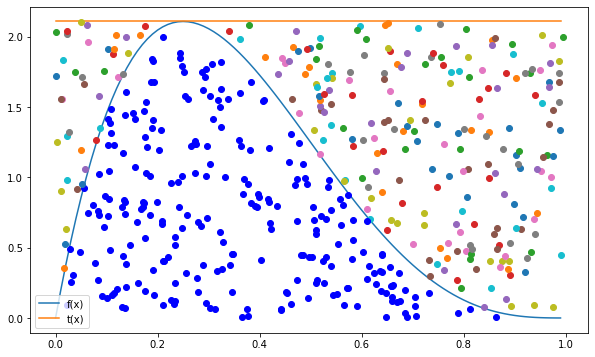

In [67]:
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x))

x = np.arange(0,1,0.01)
print(f'El máximo de f es: {max_f[0]}')

N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(10, 6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

random_variables = Acep_rechazo(R2,R1,f,t)

**Código de solución Pablo Muñoz**

In [15]:
x = np.arange(0,1,0.01)
# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = max_f # función constante


def v_a_Acep_rechazo(f:'función objetivo a generar',
                        t:'función que mayora a f',
                        N: 'Variables aleatorioas a genrar'):
    '''Esta función nos regresa N variables aleatorias por medio del método de aceptación y rechazo'''
    aceptados=[x for x in range(N)] #generar vector de puntos
    def llenar(i):
        nonlocal f, t, aceptados
        aleatorio_1=np.random.rand() #generar valor aleatori
        aleatorio_2=np.random.rand() #generar valor aleatorio
        f_x = f(aleatorio_1) #evaluar valor aleatorio en la pdf
        t_x = t #se queda así porque es constante
        condition = aleatorio_2*t_x <=f_x #validar condición 
        while condition==False: #repetir si la condición es falsa
            aleatorio_1=np.random.rand()
            aleatorio_2=np.random.rand()
            f_x = f(aleatorio_1)
            t_x = t
            condition = aleatorio_2*t_x <=f_x 
            
        aceptados[i] = aleatorio_1 #añadir cuando la condición se haga verdadera
    [llenar(i) for i in range(N)]
    return aceptados

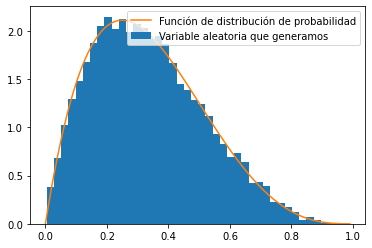

In [17]:
v_a_generada=v_a_Acep_rechazo(f,t,10000)
plt.hist(v_a_generada, density=True, bins=40, label="Variable aleatoria que generamos")
plt.plot(x, f(x), label="Función de distribución de probabilidad")
plt.legend()
plt.show()

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Código de solución estudiante 1

Código de solución estudiante 2

### Plantamiento del problema (Demostración)

-Utilizaremos la siguiente ecuación: 

$$X\sim binomial(n,p) \longrightarrow p_{i=P_(X=i)}=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

-Solamente que usaremos $X_{i+1}$ pero en lugar de $X_i$, que es la ecuación que queremos encontrar. 

-Ahora solamente hay que simplificar hasta lllegar a la ecuación siguiente

$$P_{(X=i+1)}=\frac{n!}{(i+1)!(n-i-1)!}p^i+1(1-p)^{n-i-1} =  \frac{n-i}{i+1} \frac{n!}{i!(n-i)!} (\frac{p}{1-p}) p^i (1-p)^{n-i}$$

$$ = \frac{n-i}{i+1} (\frac{p}{1-p}) P(X=i)     $$

-Y podemos concluir que $p_i$ se puede escribir como:

> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Código de solución estudiante 1

**Código de solución Pablo Muñoz**

In [18]:
def P_acum_Poisson(tasa: 'Igual al parámetro lambda que indica la media o la tasa de ocurrencia del evento',
                   k: 'Número de ocurrencias del evento'):
    Pr = np.zeros(k)
    Pr[0] =np.exp(-tasa)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(tasa*Pr[i])/(i+1)
        
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

In [22]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Esta función aplica el metodo de la trasnformada inversa para variables discretas'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v 

In [23]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    ''' Esta función genera el histograma de una variable discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()

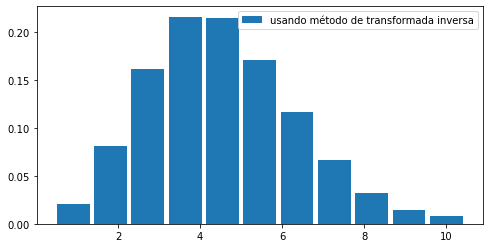

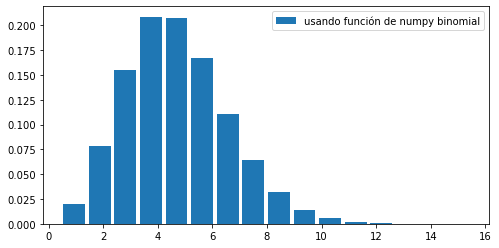

In [24]:
lam=4 ; k = 10; N = 100000

p_acum_p = P_acum_Poisson(lam,k)
u = np.random.rand(N)


d_poisson = Gen_distr_discreta(u,p_acum_p)
plot_histogram_discrete(d_poisson,'usando método de transformada inversa') #aplicando el metodo

d_poisson_numpy = np.random.poisson(lam,N)
plot_histogram_discrete(d_poisson_numpy,'usando función de numpy binomial') #aplicando funciones de numpy

Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Código de solución estudiante 1

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

$$  k! = k(1+k)! $$

$$ \frac{k!}{(k+1)!} = \frac{1}{k+1} $$

$$  P(k+1)= \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(-\lambda)^{k}}{k!}}   $$

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

In [69]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

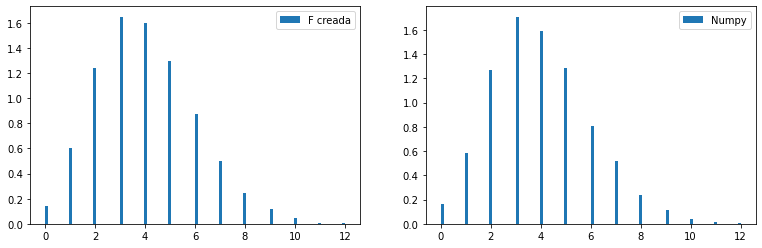

In [70]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='F creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Numpy')
plt.legend()
np.histogram
plt.show()

**Código de solución Pablo Muñoz**

### Demostración

- Para demostrar la fórmula recursiva propuesta de $p(k+1)$ hay que desarrollar el término de $p(k+1)$ siguiendo la fórmula de $p(k)$. 

$$
p(k+1)=\frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}
$$

- Dividimos este término entre p(k) y desarrollamos el exponente y el factorial, obtenemos lo siguiente:

$$
\frac{p(k+1)}{p(k)}=\frac{\frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)(k)!}}{\frac{e^{-\lambda}\lambda^k}{k!}}
$$

- Simplificando obtenemos

$$
\frac{p(k+1)}{p(k)}=\frac{\lambda}{k+1}
$$

- Despejamos $p(k+1)$ y obtenemos nuestra ecuación  

$$
p(k+1)=\frac{\lambda}{k+1}p(k)
$$


In [25]:
def P_acum_Poisson(tasa: 'Igual al parámetro lambda que indica la media o la tasa de ocurrencia del evento',
                   k: 'Número de ocurrencias del evento'):
    Pr = np.zeros(k)
    Pr[0] =np.exp(-tasa)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(tasa*Pr[i])/(i+1)
        
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

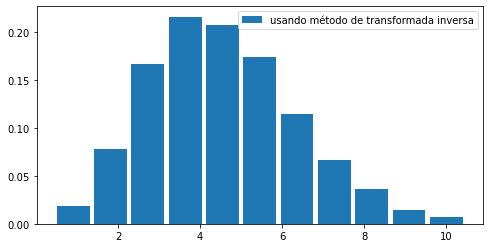

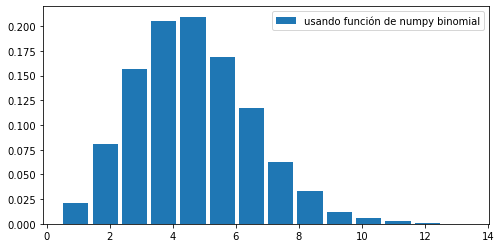

In [26]:
lam=4 ; k = 10; N = 10**4

p_acum_p = P_acum_Poisson(lam,k)
u = np.random.rand(N)


d_poisson = Gen_distr_discreta(u,p_acum_p)
plot_histogram_discrete(d_poisson,'usando método de transformada inversa') #aplicando el metodo

d_poisson_numpy = np.random.poisson(lam,N)
plot_histogram_discrete(d_poisson_numpy,'usando función de numpy binomial') #aplicando funciones de numpy